<a href="https://colab.research.google.com/github/ArkDy1312/Face-Recognition-Attendance-System-Web-App-Streamlit/blob/master/Task%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 4 : Supervised Learning

Objective - Using supervised learning (Decision Tree) to predict the right class in the Iris dataset.

Dataset Link - https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Exploring the data

In [2]:
url = 'https://drive.google.com/uc?id=11Iq7YvbWZbt8VXjfm06brx66b10YiwK-&export=download'
df = pd.read_csv(url)

df.set_index('Id', inplace=True)

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Visualising the data

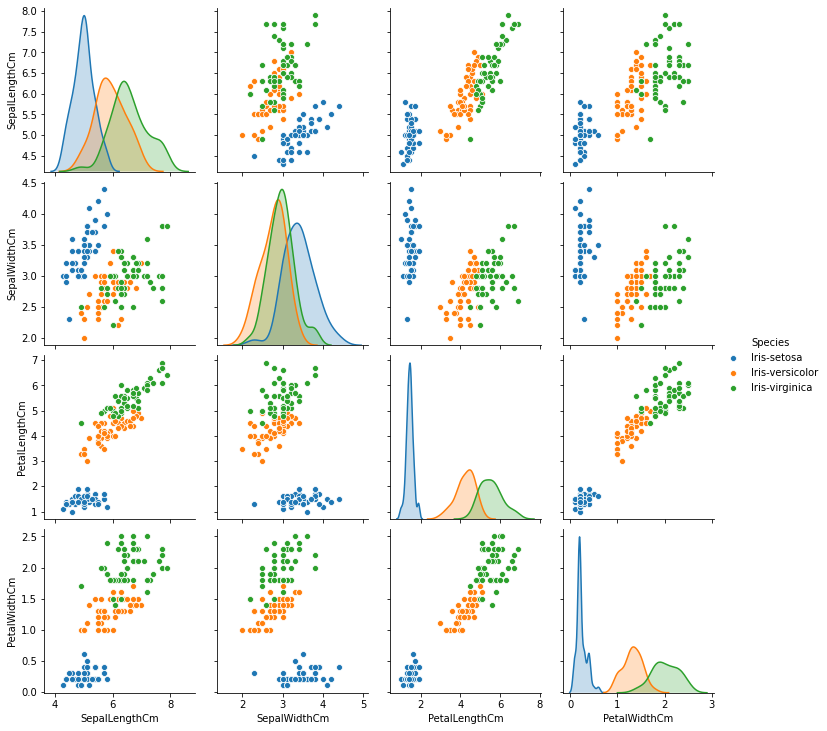

In [6]:
sns.pairplot(df, hue="Species");

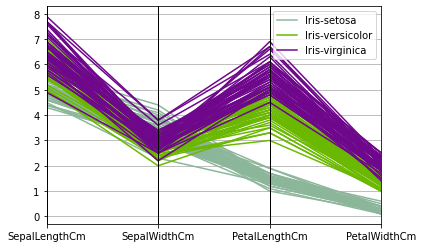

In [7]:
plt.figure()
pd.plotting.parallel_coordinates(df, 'Species');

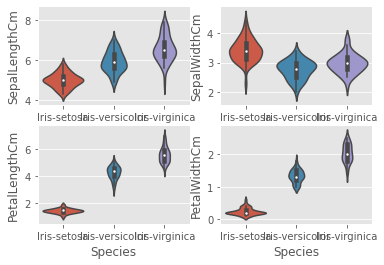

In [8]:
plt.style.use('ggplot')
plt.subplot(2,2,1)
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = df);
plt.subplot(2,2,2)
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = df);
plt.subplot(2,2,3)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = df);
plt.subplot(2,2,4)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = df);

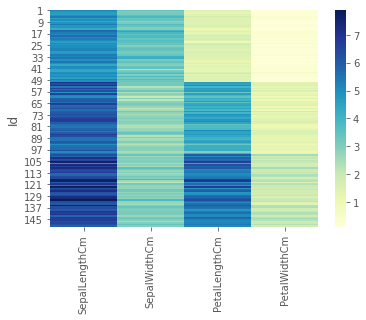

In [9]:
sns.heatmap(df.iloc[:,:-1], cmap="YlGnBu")

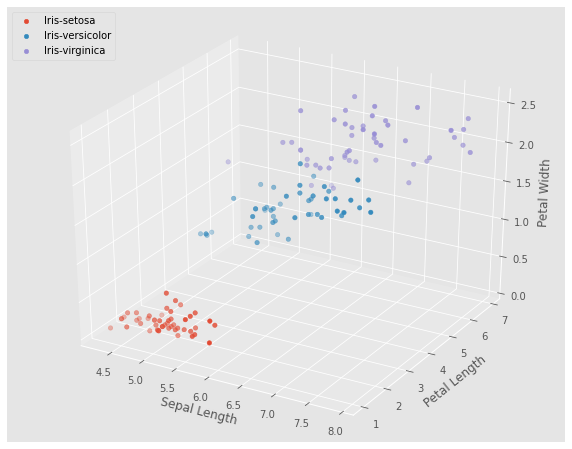

In [10]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for species, irissubset in df.groupby('Species'):
    ax.scatter(irissubset['SepalLengthCm'], irissubset['PetalLengthCm'], irissubset['PetalWidthCm'], label=species)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')
ax.legend(loc=2)

plt.show()

# Model Building

Importing the required libraries

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing, tree

Initialising training and target values, encoding the target values and  splitting them into training and test sets

In [12]:
X,y = df.iloc[:,:-1],df.iloc[:,-1]

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(y)
y_encoded = label_encoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state = 0)

Fitting the training sets to our classifier

In [13]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

Checking Accuracy score

In [14]:
pred = clf.predict(X_test)

accuracy_score(pred,y_test)

0.9736842105263158

Confusion Matrix

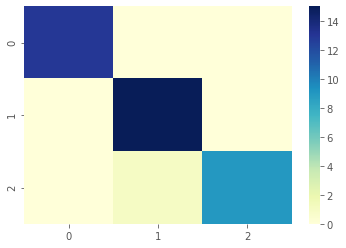

In [15]:
sns.heatmap(confusion_matrix(pred,y_test), cmap="YlGnBu");

Visualising the tree

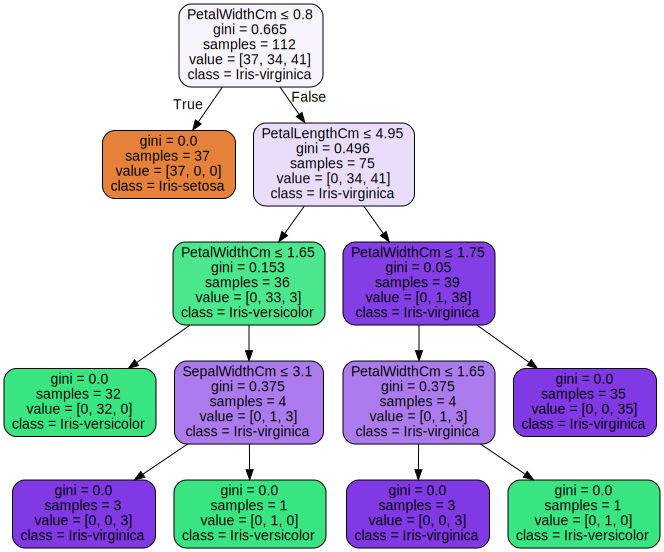

In [16]:
import graphviz 

# Visualize the graph
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=y.unique(), filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Visualising using dtreeviz library

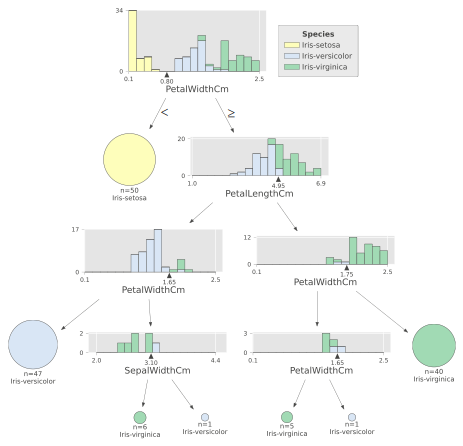

In [19]:
#installing the library
#pip install dtreeviz

from dtreeviz.trees import dtreeviz

dtreeviz(clf, X, y_encoded, target_name='Species', feature_names=X.columns, class_names=list(label_encoder.classes_))